In [37]:
#In[]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
# import statsmodels.api as sm
from tqdm import tqdm
# from multiprocessing.dummy import Pool
import dask.dataframe as dd
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.max_columns', 500)

In [36]:
#In[] 1,227,297,915 size, 7675it * 10000
crsp_df = pd.read_csv("crsp_d.csv",header=0,
    parse_dates = ['date','DCLRDT','RCRDDT'],
    dtype={
        "PERMNO": str,
        "PRC": np.float64,
        "VOL": np.float64,
        "SHROUT": np.float64,
        "DIVAMT": np.float64,
        "SHRCD":str,
        "DISTCD":str,
        "COMNAM": str,
        "TICKER": str,
        'CUSIP': str,
        "BID": np.float64,
        "ASK": np.float64}, chunksize=100000)
#Data Preprocessing
#In[]
d = {}
one = False
def insert(i,x):
    if str(x)[-1].isdigit() == False:
        return
    x = float(x)
    if i not in d:
        d[i] = [x]
    else:
        d[i].append(x)
    return
cache = []
cache_ddate = set()
for c in tqdm(crsp_df):
    c = c[(c.SHRCD.isin(('10','11'))) ]
    c = c.groupby(by=['CUSIP','date']).agg({
          'DCLRDT': 'last',
          'RCRDDT': 'last',
          'DISTCD': 'last',
          'DIVAMT': 'sum',
          'RET':'last',
          'RETX':'last',
          'PRC': 'last'}).reset_index()
    if not one:
         cusip = c.head(1).reset_index().iloc[0].CUSIP
         one = True
    count = 0
    # c['dt'] = 0
    lastDivDate = None
    for row in c.itertuples():
        if row.CUSIP != cusip:
            cusip = row.CUSIP
            count = 0
            lastDivDate = None
            for row2 in cache:
                if row2[0] in cache_ddate:
                    count = 0
                    insert(count, row.RET)
                    cache_ddate.remove(row2[0])
                    count += 1
                    lastDivDate = True
                elif lastDivDate is not None:
                    insert(count, row.RET)
                    count += 1
            cache = list()
            cache_ddate = set()
        else:
            cache.append((row.date, row.RET))
            if pd.isna(row.DCLRDT) == False:
                cache_ddate.add(row.DCLRDT)
for row2 in cache:
    if row2[0] in cache_ddate:
        insert(count, row.RET)
        cache_ddate.remove(row2[0])
        count += 1
        lastDivDate = True
    elif lastDivDate is not None:
        insert(count, row.RET)
        count += 1        

526it [08:41,  1.01it/s]


KeyboardInterrupt: 

In [29]:
#In[] 1,227,297,915 size, 7675it * 10000
crsp_df = pd.read_csv("crsp_d.csv",header=0,
    parse_dates = ['date','DCLRDT','RCRDDT'],
    dtype={
        "PERMNO": str,
        "PRC": np.float64,
        "VOL": np.float64,
        "SHROUT": np.float64,
        "DIVAMT": np.float64,
        "SHRCD":str,
        "DISTCD":str,
        "COMNAM": str,
        "TICKER": str,
        'CUSIP': str,
        "BID": np.float64,
        "ASK": np.float64}, chunksize=100000)
#Data Preprocessing
#In[]
d = {}
one = False
def insert(i,x):
    if str(x)[-1].isdigit() == False:
        return
    x = float(x)
    if i not in d:
        d[i] = [x]
    else:
        d[i].append(x)
    return
cache = []
cache_ddate = set()
for c in tqdm(crsp_df):
    c = c[(c.SHRCD.isin(('10','11'))) ]
    c = c.groupby(by=['CUSIP','date']).agg({
          'DCLRDT': 'last',
          'RCRDDT': 'last',
          'DISTCD': 'last',
          'DIVAMT': 'sum',
          'RET':'last',
          'RETX':'last',
          'PRC': 'last'}).reset_index()
    if not one:
         cusip = c.head(1).reset_index().iloc[0].CUSIP
         one = True
    count = 0
    # c['dt'] = 0
    lastDivDate = None
    for row in c.itertuples():
        if row.CUSIP != cusip:
            cusip = row.CUSIP
            count = 0
            lastDivDate = None
            for row2 in cache:
                if row2[0] in cache_ddate:
                    count = 0
                    # insert(count, row.RET)
                    cache_ddate.remove(row2[0])
                    count += 1
                    lastDivDate = True
                elif lastDivDate is not None:
                    insert(count * -1, row.RET)
                    count += 1
            cache = list()
            cache_ddate = set()
        else:
            cache.append((row.date, row.RET))
            if pd.isna(row.DCLRDT) == False:
                cache_ddate.add(row.DCLRDT)
for row2 in cache:
    if row2[0] in cache_ddate:
        insert(count, row.RET)
        cache_ddate.remove(row2[0])
        count += 1
        lastDivDate = True
    elif lastDivDate is not None:
        insert(count, row.RET)
        count += 1        

723it [32:10,  3.49s/it]C:\Users\kobe\anaconda3\envs\fina4359\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
819it [38:00,  2.78s/it]


In [30]:
x = range(-30, 61, 1)
dlist = [ 100*sum(d[key])/len(d[key]) for key in x ]
print(dlist)

[0.03842154501437095, 0.03184474864351832, 0.05618858012814623, 0.059929092179959766, 0.07250599317406044, 0.06062770581591875, 0.06113053989091284, 0.07481733969668132, 0.07281201566448767, 0.07382445836702779, 0.043297208259989055, 0.04627693659650009, 0.06473718472996691, 0.07424719861647744, 0.08426161912540304, 0.04352533923667761, 0.07414044330655926, 0.07888081155726603, 0.08557375924010376, 0.0662827963688583, 0.02900688704476715, 0.049443721565513014, 0.03891412519583672, 0.04807776074307821, 0.042288654611220014, 0.0012138923941151767, 0.06542582598776894, 0.06816720983965269, 0.06654150767972072, 0.07638566590527801, 0.44737121138990804, 0.07640416652215028, 0.0665076782327325, 0.06817100178189701, 0.06550893805045671, 0.0011785416677037026, 0.042318529996462705, 0.04803462982444856, 0.038993482306803016, 0.049429423398182355, 0.029055765332266798, 0.06628546502317004, 0.08553828583739174, 0.0789810867356533, 0.07426462442995543, 0.04358774045117484, 0.08424649625652413, 0.0

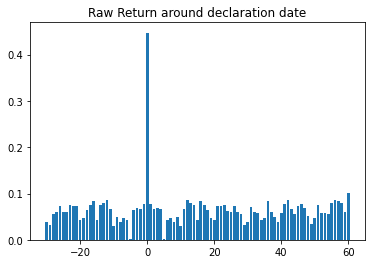

In [31]:
plt.bar(x,dlist)
plt.title('Raw Return around declaration date')
plt.show()

In [11]:
sum(d[0])

-1793.4895250002157

In [32]:
# c[c.DCLRDT.notna()]
# c[c.CUSIP=='05978R10'][4000:4500]

In [6]:
import pickle
filename = 'DCLRDT_Figure3.pkl'
with open(filename,'wb') as f:
     pickle.dump(dlist, f)

In [7]:
with open(filename,'rb') as f:
     a = pickle.load(f)

a == dlist

True